<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/answer/02a_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 機械学習の基本的な手順

breast cancerデータについて、識別を行うJupyter Notebook (ipynbファイル)を提出してください。その際、k-NN法のkの値を変えて識別実験を行って性能の変化を観察してください。

### パッケージの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## 学習データの読み込み

In [2]:
bc = load_breast_cancer()
print(bc.DESCR)
X = bc.data
y = bc.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## 前処理

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

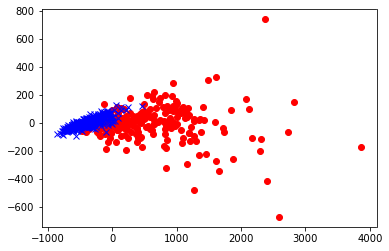

In [4]:
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"bx")

### 標準化

In [5]:
X_scaled = preprocessing.scale(X)

学習

In [6]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X_scaled, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.05)


### 分割学習法での評価

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

学習用データで識別器の学習を行います．

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

評価用データに対する混同行列と各種の評価指標を出力します．

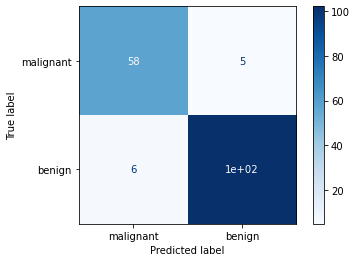

In [9]:
plot_confusion_matrix(clf, X_test, y_test,
                      display_labels=bc.target_names,
                      cmap=plt.cm.Blues,
                      normalize=None)

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))

precision    recall  f1-score   support

   malignant       0.91      0.92      0.91        63
      benign       0.95      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [11]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))


precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        63
      benign       0.94      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [12]:
clf3 = KNeighborsClassifier(n_neighbors=10)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))

precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



もともとのデータがかなりきれいに分離しているので、ハイパーパラメータ調整を行ってもあまり性能の変化はないようです。